In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# print all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"{var}: shape = {dataset.variables[var].shape}")

size: shape = (496, 4)
location_x: shape = (496, 4)
location_y: shape = (496, 4)
location_z: shape = (496, 4)


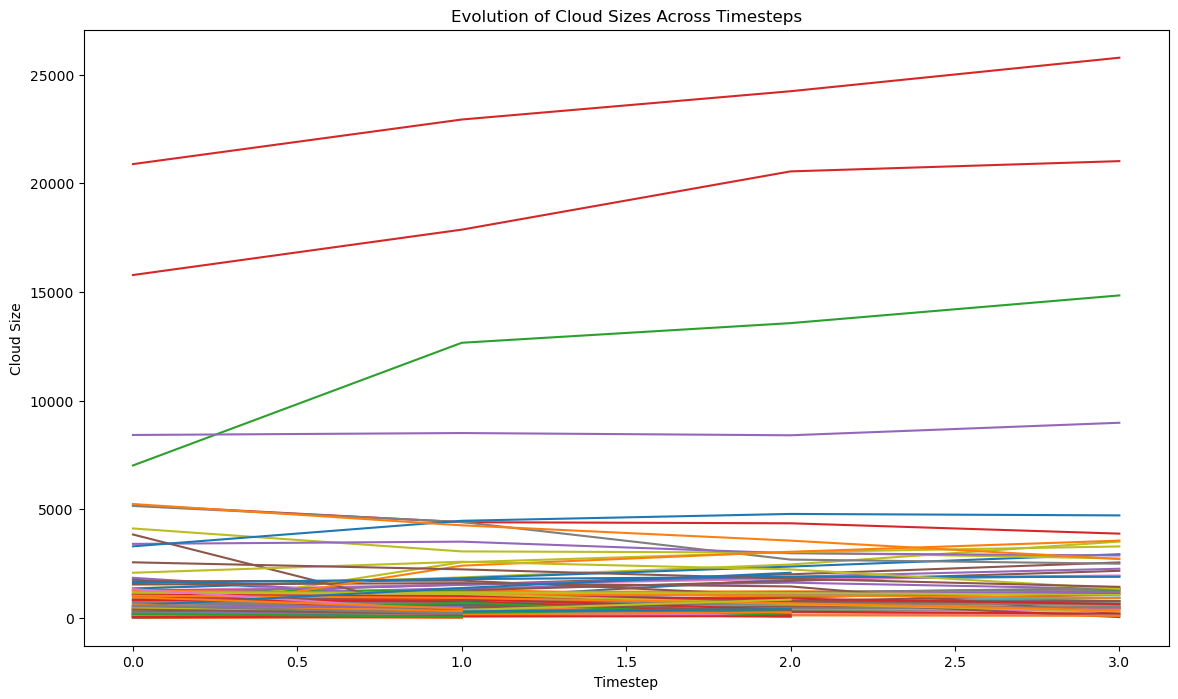

[[1771.0 455.0 352.0 15781.0 1037.0 1094.0 306.0 750.0 1361.0 422.0
  1351.0 507.0 7017.0 20886.0 8420.0 843.0 1253.0 345.0 483.0 371.0 478.0
  609.0 1286.0 11.0 1846.0 22.0 414.0 98.0 26.0 131.0 94.0 303.0 179.0
  5193.0 345.0 251.0 72.0 5153.0 4117.0 63.0 154.0 1119.0 170.0 66.0
  3408.0 1686.0 421.0 128.0 142.0 37.0 13.0 10.0 16.0 26.0 39.0 37.0 35.0
  32.0 12.0 42.0 282.0 83.0 13.0 100.0 70.0 36.0 23.0 413.0 525.0 43.0
  43.0 208.0 75.0 166.0 41.0 48.0 207.0 1016.0 24.0 34.0 79.0 82.0 69.0
  10.0 28.0 20.0 20.0 124.0 114.0 34.0 46.0 96.0 10.0 424.0 51.0 63.0
  12.0 27.0 794.0 11.0]
 [919.0 1307.0 531.0 17869.0 1361.0 1535.0 430.0 920.0 1866.0 567.0
  1830.0 557.0 12663.0 22937.0 8509.0 1266.0 1538.0 405.0 -- 370.0 778.0
  705.0 1218.0 -- 905.0 -- 392.0 177.0 -- 117.0 -- -- 253.0 4406.0 418.0
  237.0 -- 4415.0 3062.0 -- -- 1195.0 275.0 -- 3511.0 1718.0 545.0 --
  127.0 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

In [39]:
# Load the NetCDF file
  # Adjust the path accordingly
dataset = Dataset(nc_file, 'r')

# Read cloud sizes, assuming variable name is 'size' with dimensions ('cloud', 'timestep')
cloud_sizes = dataset.variables['size'][:].T  # Transpose if necessary to match ('timestep', 'cloud')

# Number of timesteps and clouds
num_timesteps = cloud_sizes.shape[0]
num_clouds = cloud_sizes.shape[1]

# Generate a plot for each cloud
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Extract size evolution for this cloud
    size_evolution = cloud_sizes[:, cloud_idx]
    
    # Plot the evolution
    plt.plot(range(num_timesteps), size_evolution, label=f'Cloud {cloud_idx+1}')

plt.xlabel('Timestep')
plt.ylabel('Cloud Size')
plt.title('Evolution of Cloud Sizes Across Timesteps')
#plt.legend()
plt.show()

# Close the dataset after use
dataset.close()

print (cloud_sizes)

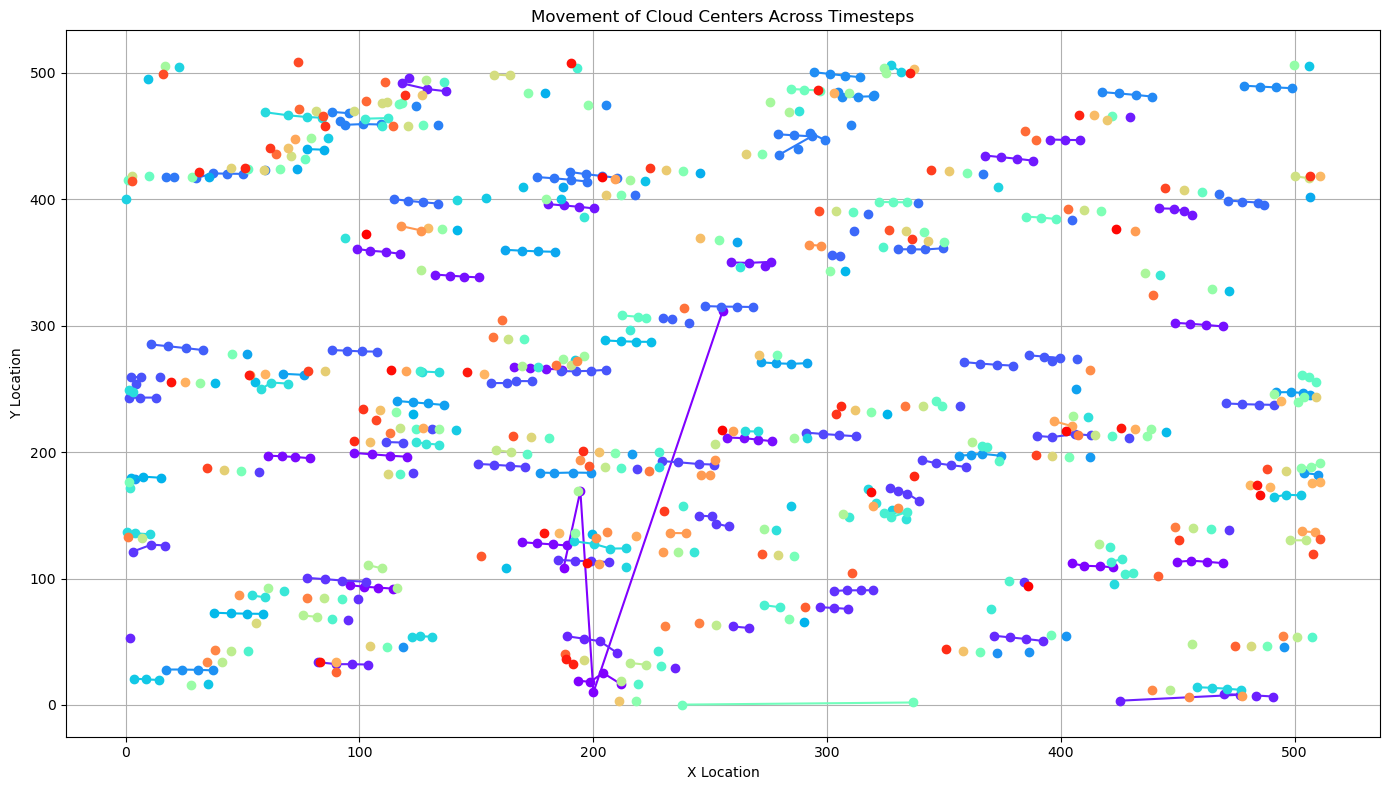

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path to your actual NetCDF file location
dataset = Dataset(nc_file, 'r')

# Reading cloud center locations with correct dimensions
x_centers = dataset.variables['location_x'][:]  # shape should now be (clouds, timesteps)
y_centers = dataset.variables['location_y'][:]  # shape should now be (clouds, timesteps)

# Number of clouds and timesteps
num_clouds, num_timesteps = x_centers.shape

# Generate a color map for clouds
colors = cm.rainbow(np.linspace(0, 1, num_clouds))

# Plot for cloud center movements
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Filter out NaN values for x and y centers
    valid_idx = ~np.isnan(x_centers[cloud_idx, :]) & ~np.isnan(y_centers[cloud_idx, :])
    if np.any(valid_idx):  # Check if there are any valid points to plot for this cloud
        plt.plot(x_centers[cloud_idx, valid_idx], y_centers[cloud_idx, valid_idx], '-o', color=colors[cloud_idx], label=f'Cloud {cloud_idx+1}')

plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.title('Movement of Cloud Centers Across Timesteps')
plt.grid(True)
plt.tight_layout()
plt.show()

dataset.close()
